In [51]:
import pandas as pd 
import numpy as np
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 

In [52]:
df = pd.read_excel('Loan requests.xlsx')

In [53]:
df.head()

,Loan Request ID,Gender,Age,Salary,Approval
0,732,Female,39,137000,Yes
1,258,Female,41,65500,No
2,1059,Male,42,146500,Yes
3,1075,Male,62,83000,Yes
4,853,Male,42,75000,No


In [54]:
df.isnull().sum()

Loan Request ID    0
Gender             0
Age                0
Salary             0
Approval           0
dtype: int64

/Users/masudulislam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

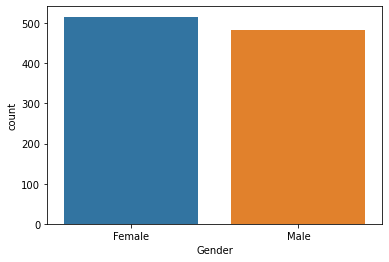

In [55]:
# categorical attribute visualization 
sns.countplot(df['Gender'])

/Users/masudulislam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

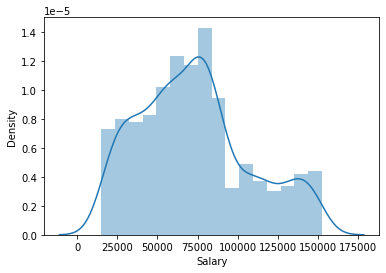

In [56]:
# numerical attribute visualization
sns.distplot(df['Salary'])

In [57]:
#apply log transformation to the attribute
#df['Salary']= np.log(df['Salary'])

In [58]:
df = df.drop('Loan Request ID', axis = 'columns')

In [59]:
df.tail()

,Gender,Age,Salary,Approval
995,Male,31,75000,No
996,Male,27,22000,No
997,Female,43,67500,No
998,Male,48,80500,No
999,Female,36,114500,No


In [60]:
from sklearn.preprocessing import OneHotEncoder

In [61]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [62]:
ohc = OneHotEncoder()
ohc

OneHotEncoder()

In [63]:
ohc.fit_transform(df[['Gender']]).toarray()

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [64]:
dv = pd.get_dummies(df['Gender'], drop_first = True)
dv.head()

,Male
0,0
1,0
2,1
3,1
4,1


In [65]:
new_df = df.drop('Gender', axis = 1) # dropping the "Gender" column 
new_df.head()

,Age,Salary,Approval
0,39,137000,Yes
1,41,65500,No
2,42,146500,Yes
3,62,83000,Yes
4,42,75000,No


In [66]:
df = pd.concat([new_df, dv], axis = 1)
df.head()

,Age,Salary,Approval,Male
0,39,137000,Yes,0
1,41,65500,No,0
2,42,146500,Yes,1
3,62,83000,Yes,1
4,42,75000,No,1


In [67]:
x = df.drop(columns=['Approval'], axis=1)
y = df['Approval']

# train_test_split

In [94]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=1)

In [95]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [112]:
# model = DecisionTreeClassifier()
model = RandomForestClassifier()
model.fit(xtrain, ytrain)

RandomForestClassifier()

# Enter the desire parameter for loan request

In [120]:
xinput = np.array([30, 12000, 0])  # 1 = female, 0 = male

In [123]:
ypred = model.predict([xinput])
ypred

/Users/masudulislam/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)

In [124]:
# model accurecy 
print('Accurecy is', model.score(xtest, ytest)*100, '%')

Accurecy is 90.4 %


# Accuracy check using different classification models

In [90]:
df= pd.read_excel('Loan requests.xlsx')

In [275]:
df.head()

,Loan Request ID,Gender,Age,Salary,Approval
0,732,Female,39,137000,Yes
1,258,Female,41,65500,No
2,1059,Male,42,146500,Yes
3,1075,Male,62,83000,Yes
4,853,Male,42,75000,No


In [276]:
df = df.drop(['Loan Request ID'], axis = 1) # droping unnecessary colum

<AxesSubplot:>

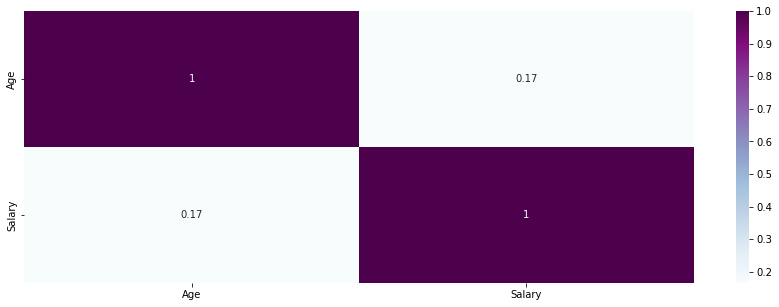

In [277]:
# correlation with attributes 
corr = df.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr, annot= True, cmap='BuPu')

In [278]:
from sklearn.preprocessing import LabelEncoder

In [279]:
df.head()

,Gender,Age,Salary,Approval
0,Female,39,137000,Yes
1,Female,41,65500,No
2,Male,42,146500,Yes
3,Male,62,83000,Yes
4,Male,42,75000,No


In [280]:
cols= ['Gender', 'Age', 'Salary', 'Approval']
le = LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])

In [281]:
df.head()

,Gender,Age,Salary,Approval
0,0,19,220,1
1,0,21,97,0
2,1,22,236,1
3,1,42,130,1
4,1,22,114,0


In [282]:
# train_test_split 

x = df.drop(columns=['Approval'], axis=1)
y = df['Approval']

In [283]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state= 1)

In [284]:
# model training
from sklearn.model_selection import cross_val_score

def classify (model, x, y): 
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state= 1)
    model.fit(xtrain, ytrain)
    print ('Accuracy is = ', model.score(xtest, ytest)*100) # displaying in percent
    
    # cross validation for better validation of model
    score= cross_val_score(model, x, y, cv=5)
    print('Cross validation is = ', np.mean(score)*100)


# LogisticRegression

In [285]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,x,y)

Accuracy is =  86.8
Cross validation is =  82.30000000000001


# DecisionTreeClassifier 

In [82]:
from sklearn.tree import DecisionTreeClassifier 
import numpy as np
model = DecisionTreeClassifier()
classify(model, x, y)

Accuracy is =  90.4
Cross validation is =  88.3


# RandomForestClassifier, ExtraTreesClassifier

In [83]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, x, y)

Accuracy is =  90.4
Cross validation is =  88.99999999999999


In [84]:
model = ExtraTreesClassifier()
classify(model, x, y)

Accuracy is =  90.4
Cross validation is =  89.50000000000001
